In [1]:
import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from datetime import datetime
import matplotlib.pyplot as plt 


Defining the interval of evaluation of the models:

In [2]:
ini_evaluate_re = '2021-04-18'
end_evaluate_re = '2021-08-15'
ini_evaluate_jp = '2022-02-06' 
end_evaluate_jp = '2022-06-12'
ini_evaluate_fo = '2022-01-02'
end_evaluate_fo = '2022-05-08'
ini_evaluate_rj = '2019-02-10'
end_evaluate_rj = '2019-06-16'

In [3]:
def get_df_dengue_chik(city):
    df_dengue = pd.read_csv(f'../data/dengue_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_dengue.index = pd.to_datetime(df_dengue.index)
    
    df_chik = pd.read_csv(f'../data/chik_{city}_cluster.csv', index_col = 'Unnamed: 0' )
    df_chik.index = pd.to_datetime(df_chik.index)
    
    return df_dengue, df_chik 

In [4]:
def plot_incidence():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    
    city_name = 'Recife'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 0].set_xlabel('date')
    
    axs[0, 0].grid()
    
    axs[0, 0].legend()
    
    axs[0, 0].set_title(city_name)
    
    city = 2507507
    
    city_name = 'João Pessoa'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[0, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[0, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[0, 1].set_xlabel('date')
    
    axs[0, 1].grid()
    
    axs[0, 1].legend()
    
    axs[0, 1].set_title(city_name)
    
    city = 2304400
    
    city_name = 'Fortaleza'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 0].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 0].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 0].set_xlabel('date')
    
    axs[1, 0].grid()
    
    axs[1, 0].legend()
    
    axs[1, 0].set_title(city_name)
    
    city = 3304557
    
    city_name = 'Rio de Janeiro'
    
    df_dengue, df_chik = get_df_dengue_chik(city)
    
    axs[1, 1].plot(df_dengue[f'casos_est_{city}'], label = 'dengue')
    
    axs[1, 1].plot(df_chik[f'casos_est_{city}'], label = 'chik')
    
    axs[1, 1].set_xlabel('date')
    
    axs[1, 1].grid()
    
    axs[1, 1].legend()
    
    axs[1, 1].set_title(city_name)
    
    plt.savefig(f'../figures/incidence.png',bbox_inches='tight',  dpi = 300)
    
    plt.show()

    return 
    
    

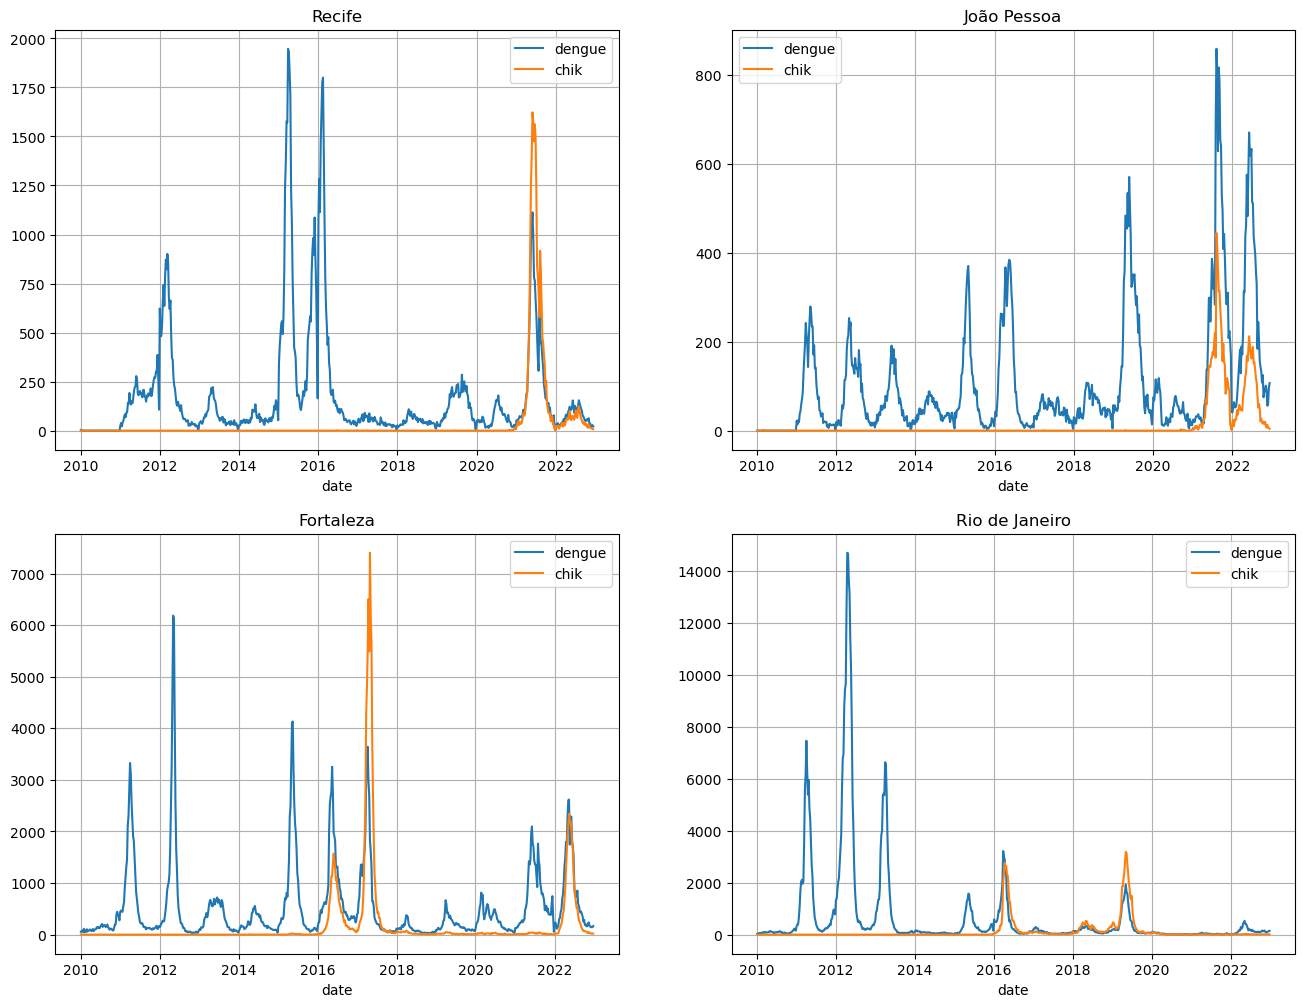

In [5]:
plot_incidence()

In [6]:
def annotate_axes(ax,text):
    ax.set_xlabel(text)


In [7]:
def plot_dengue_test_lstm(ax, city, doenca, label, title):
    
    data_lstm = pickle.load(open(f'../predictions/lstm/lstm_{city}_{doenca}_{label}.pkl', 'rb'))
    
    pred_window = 4
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
    split_point = len(data_lstm['xdata'] )

    df_predicted = data_lstm['pred'] 
    df_predicted25 = data_lstm['lb']
    df_predicted975 = data_lstm['ub']
        
    ax.plot(indice[split_point + len(indice)-Ydata.shape[0]:], Ydata[split_point:, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[split_point+ len(indice)-Ydata.shape[0]:], df_predicted.iloc[split_point:,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[split_point + 7:], df_predicted25[df_predicted25.columns[-1]][split_point:] * factor,
                       df_predicted975[df_predicted975.columns[-1]][split_point:] * factor,
                       color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    
    return 

In [8]:
def plot_dengue_bi_lstm():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_dengue_test_lstm(axd['a'], city, doenca = 'dengue', label = 'msle', title = 'Recife - MSLE')
   
    # joao pessoa
    city = 2507507
    plot_dengue_test_lstm(axd['b'], city, doenca = 'dengue', label = 'msle', title = 'João Pessoa - MSLE')
   
    # fortaleza
    city = 2304400
    plot_dengue_test_lstm(axd['c'], city, doenca = 'dengue', label = 'msle', title = 'Fortaleza - MSLE')
   
    # Rio de Janeiro
    city = 3304557
    plot_dengue_test_lstm(axd['d'], city, doenca = 'dengue', label = 'msle', title = 'Rio de Janeiro - MSLE')
   
    fig.savefig(f'../figures/dengue_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()
    

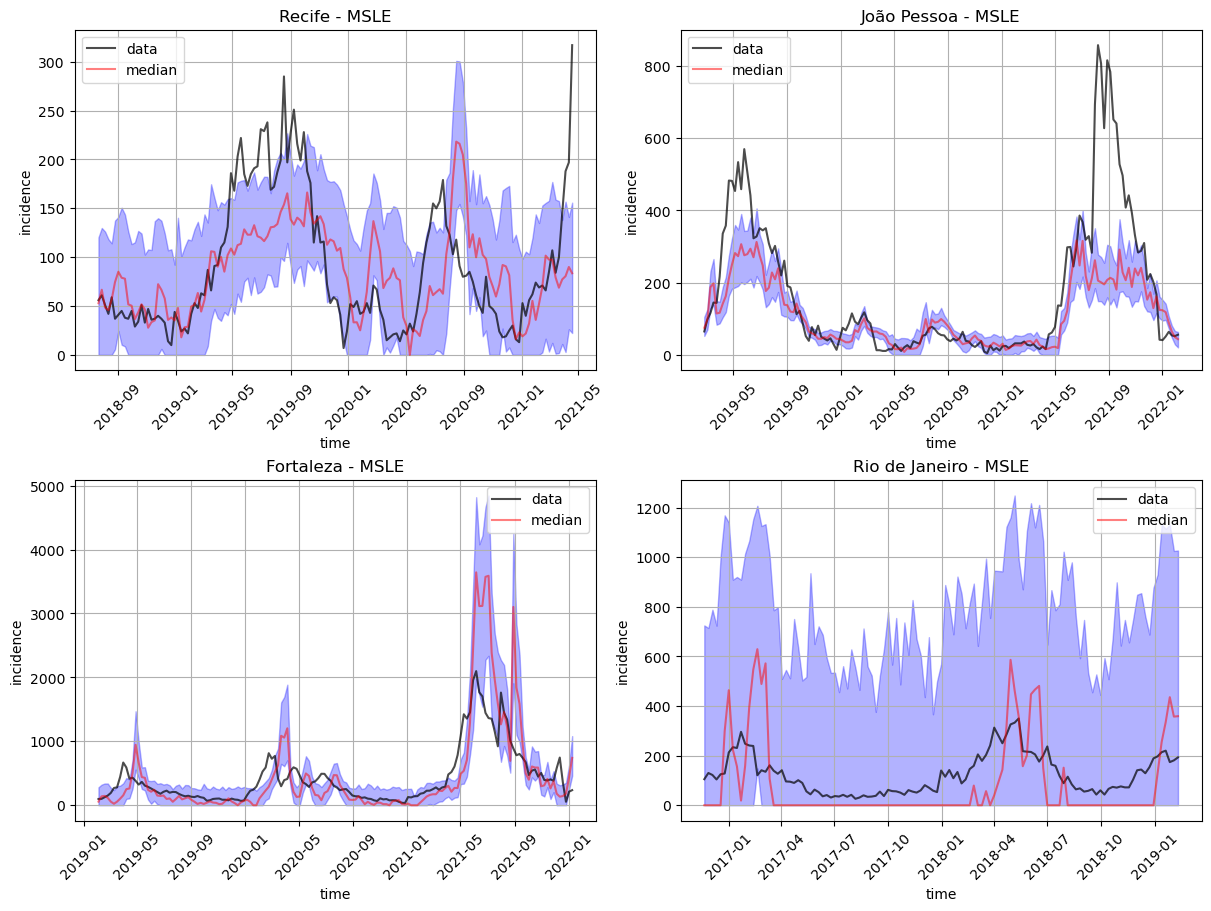

In [9]:
plot_dengue_bi_lstm()

In [10]:
def plot_pred_test(ax, city, doenca, title):
    
    data_pgbm = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_{doenca}_train_test_predictions.pkl', 'rb'))
    
    ydata = data_pgbm['target'] 
    split_point = data_pgbm['train_size']
    
    ax.plot(ydata[split_point + 4:], 'k-', label='data')

    pred_window = 4
    
    x = data_pgbm['dates'][split_point:]
    y = data_pgbm['preds'][split_point:]
    y25 = data_pgbm['preds25'][split_point:]
    y975 = data_pgbm['preds975'][split_point:]

    ax.plot(x, y, 'r-', alpha=0.5, label='median')
    ax.fill_between(x, np.array(y25), np.array(y975), color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return


In [11]:
def plot_dengue_pgbm():
    doenca = 'dengue'
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_pred_test(axd['a'], city, doenca, title = 'Recife')
    
    # joao pessoa
    city = 2507507
    plot_pred_test(axd['b'], city, doenca, title = 'João Pessoa')
    
    # fortaleza
    city = 2304400
    plot_pred_test(axd['c'], city, doenca, title = 'Fortaleza')
    
    # Rio de Janeiro
    city = 3304557
    plot_pred_test(axd['d'], city, doenca, title = 'Rio de Janeiro')
    
    fig.savefig(f'../figures/dengue_pgbm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()

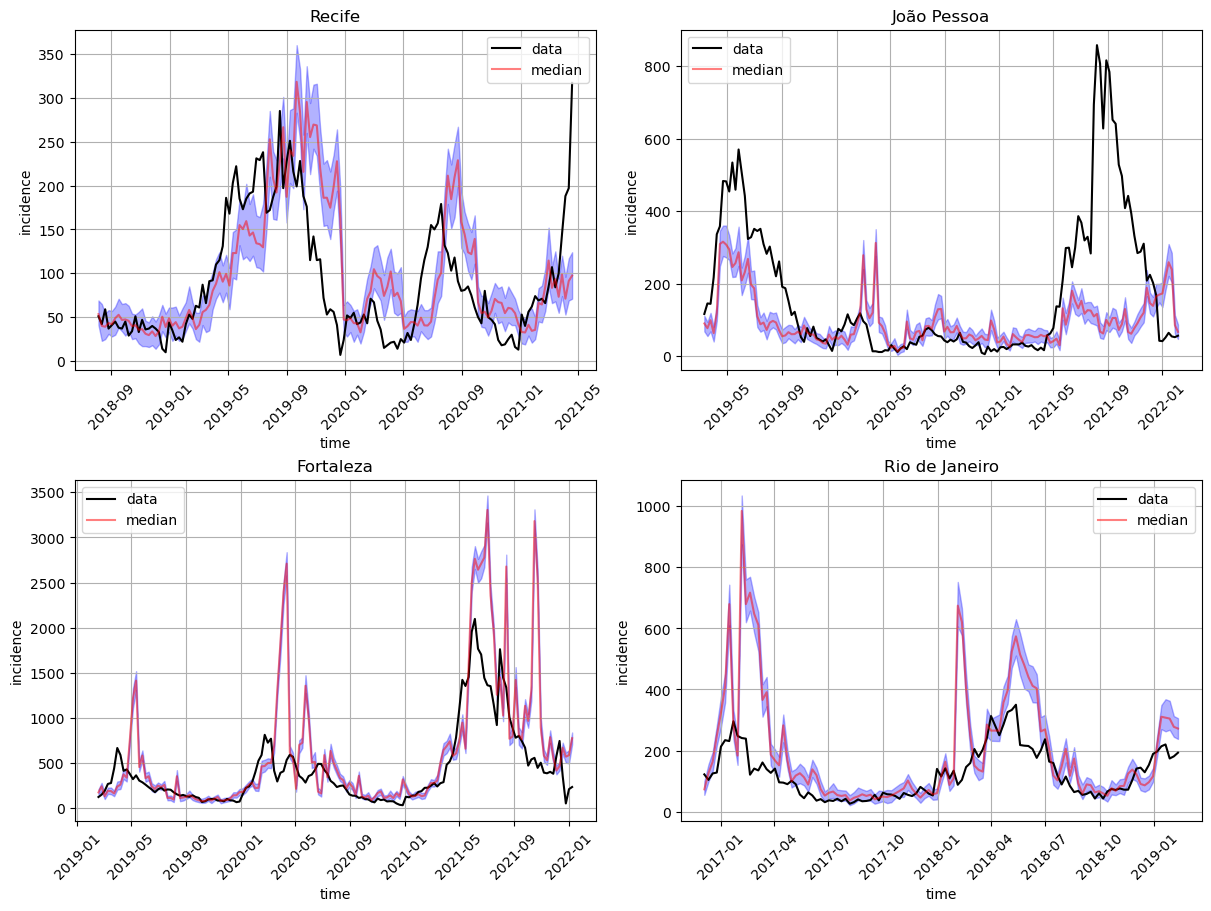

In [12]:
plot_dengue_pgbm()

In [13]:
def plot_cross_preds_chik(ax, city, title, ini_evaluate, end_evaluate):
    
    data_pgbm = pickle.load(open(f'../predictions/pgbm/pgbm_{city}_chik_cross_predictions.pkl', 'rb'))
     
    ini_index_ml = data_pgbm['dates'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index_ml = data_pgbm['dates'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ydata = data_pgbm['target']
    x = data_pgbm['dates']
    y = data_pgbm['preds']
    y25 = data_pgbm['preds25']
    y975 = data_pgbm['preds975']
        
    ax.plot(ydata[ini_index_ml+4:end_index_ml+4], 'k-', label='data')
     
    ax.plot(x[ini_index_ml:end_index_ml],y[ini_index_ml: end_index_ml], 'r-', alpha=0.5, label='median')
    
    ax.fill_between(x[ini_index_ml:end_index_ml], np.array(y25[ini_index_ml:end_index_ml]), np.array(y975[ini_index_ml:end_index_ml]), color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    return

In [14]:
def plot_pgbm_cross_chik():
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")
    
    # recife
    city = 2611606
    plot_cross_preds_chik(axd['a'], city, title = 'Recife', ini_evaluate = ini_evaluate_re, end_evaluate = end_evaluate_re)
    
    # joao pessoa
    city = 2507507
    plot_cross_preds_chik(axd['b'], city, title = 'João Pessoa', ini_evaluate = ini_evaluate_jp, end_evaluate = end_evaluate_jp)
    
    # fortaleza
    city = 2304400
    plot_cross_preds_chik(axd['c'], city, title = 'Fortaleza', ini_evaluate = ini_evaluate_fo, end_evaluate = end_evaluate_fo)
    
    # Rio de Janeiro
    city = 3304557
    plot_cross_preds_chik(axd['d'], city, title = 'Rio de Janeiro', ini_evaluate = ini_evaluate_rj, end_evaluate = end_evaluate_rj)
    
    fig.savefig(f'../figures/pgbm_cross_chik.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()

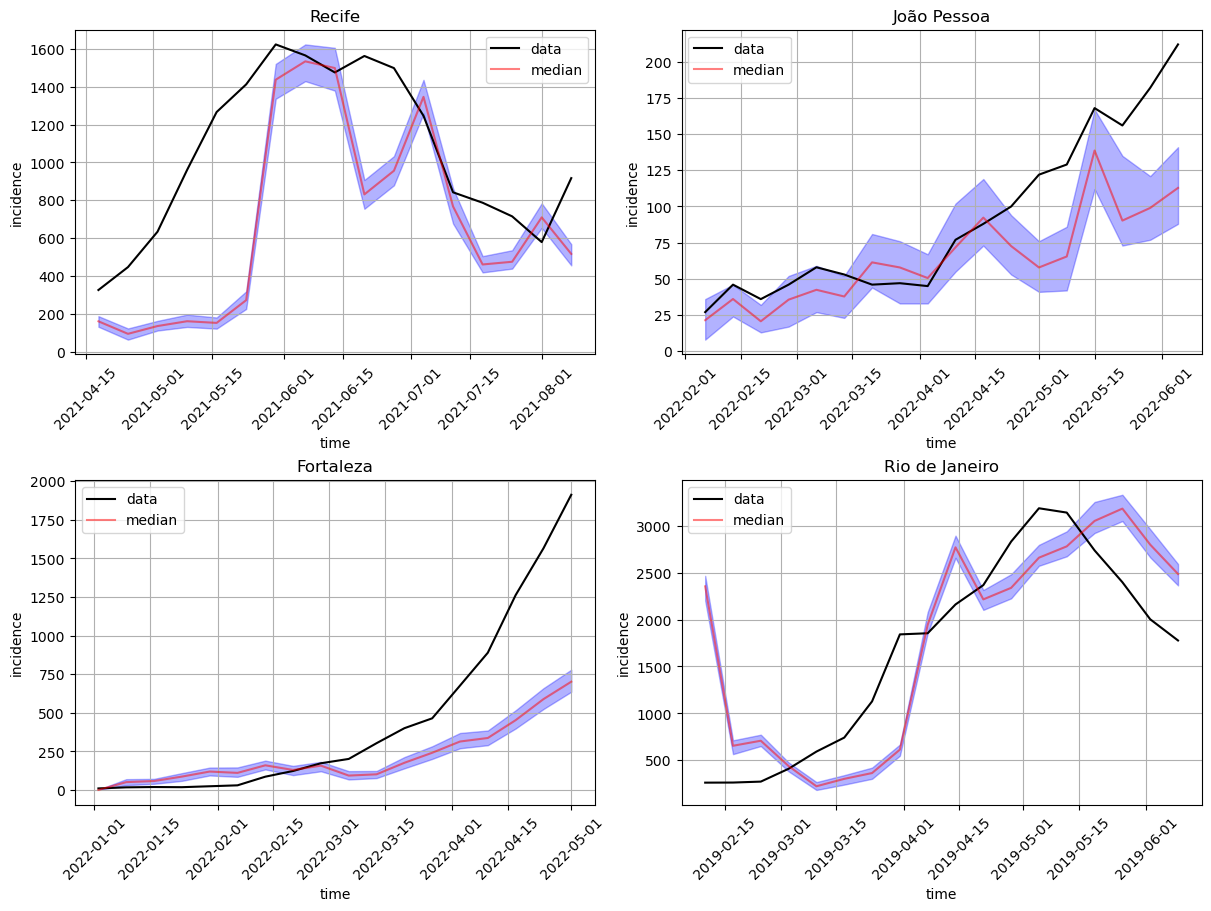

In [15]:
plot_pgbm_cross_chik()

In [16]:
def plot_cross_chik_lstm(ax, city, title, ini_evaluate, end_evaluate):
    
    label_m = 'msle_all'
    data_lstm = pickle.load(open(f'../predictions/lstm/lstm_{city}_chik_predictions_{label_m}.pkl', 'rb'))
    
    pred_window = 4
    Ydata = data_lstm['target'] 
    indice = data_lstm['indice']
    factor = data_lstm['factor'] 
  
    df_predicted = data_lstm['pred'] 
    df_predicted25 = data_lstm['lb']
    df_predicted975 = data_lstm['ub']
    
    ini_index = indice.index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index = indice.index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    

    ax.plot(indice[ini_index:end_index], Ydata[ini_index- 7:end_index- 7, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[ini_index:end_index], df_predicted.iloc[ini_index-7:end_index-7,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[ini_index:end_index], df_predicted25[df_predicted25.columns[-1]][ini_index-7:end_index-7] * factor,
                       df_predicted975[df_predicted975.columns[-1]][ini_index-7:end_index-7] * factor,
                       color='b', alpha=0.3)
    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return 

def plot_transf_chik_lstm(ax,city, title, ini_evaluate, end_evaluate):
    
    label = 'transf_msle'

    data_transf = pickle.load(open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb'))
    
    pred_window = 4
    Ydata = data_transf['target'] 
    indice = data_transf['indice']
    factor = data_transf['factor'] 
    split_point = data_transf['train_size'] 
  
    df_predicted = data_transf['pred'] 
    df_predicted25 = data_transf['pred25']
    df_predicted975 = data_transf['pred975']
    
    ini_index = indice.index(datetime.strptime(ini_evaluate, '%Y-%m-%d').date())
    end_index = indice.index(datetime.strptime(end_evaluate, '%Y-%m-%d').date())

    
    ax.plot(indice[ini_index:end_index], Ydata[ini_index-7:end_index-7, -1] * factor, 'k-', alpha=0.7, label='data')
    ax.plot(indice[ini_index:end_index], df_predicted.iloc[ini_index-7:end_index-7,-1] * factor, 'r-', alpha=0.5, label='median')
    

    ax.fill_between(indice[ini_index:end_index], df_predicted25[df_predicted25.columns[-1]][ini_index-7:end_index-7] * factor,
                       df_predicted975[df_predicted975.columns[-1]][ini_index-7:end_index-7] * factor,
                       color='b', alpha=0.3)

    ax.grid()
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("time")
    ax.set_ylabel("incidence")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return 

In [17]:
def plot_chik_bi_lstm():
    
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd'],
                                  ['e', 'f'],
                                  ['g', 'h']],
                              figsize=(12, 18), layout="constrained")
    
    # recife
    city = 2611606
    plot_transf_chik_lstm(axd['a'], city, title = 'Recife (with transfer learning)', ini_evaluate = ini_evaluate_re, end_evaluate = end_evaluate_re)
    plot_cross_chik_lstm(axd['b'], city, title = 'Recife (no transfer learning)', ini_evaluate =ini_evaluate_re, end_evaluate = end_evaluate_re)

    # joao pessoa
    city = 2507507
    plot_transf_chik_lstm(axd['c'], city, title = 'João Pessoa (with transfer learning)',  ini_evaluate = ini_evaluate_jp, end_evaluate = end_evaluate_jp)
    plot_cross_chik_lstm(axd['d'], city, title = 'João Pessoa (no transfer learning)', ini_evaluate = ini_evaluate_jp, end_evaluate = end_evaluate_jp)

    # fortaleza
    city = 2304400
    plot_transf_chik_lstm(axd['e'], city, title = 'Fortaleza (with transfer learning)', ini_evaluate = ini_evaluate_fo, end_evaluate = end_evaluate_fo)
    plot_cross_chik_lstm(axd['f'], city, title = 'Fortaleza (no transfer learning)', ini_evaluate = ini_evaluate_fo, end_evaluate = end_evaluate_fo)

    # Rio de Janeiro
    city = 3304557
    plot_transf_chik_lstm(axd['g'], city, title = 'Rio de Janeiro (with transfer learning)', ini_evaluate = ini_evaluate_rj, end_evaluate = end_evaluate_rj)
    plot_cross_chik_lstm(axd['h'], city, title = 'Rio de Janeiro (no transfer learning)', ini_evaluate = ini_evaluate_rj, end_evaluate = end_evaluate_rj)

    fig.savefig(f'../figures/chik_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    plt.show()
    

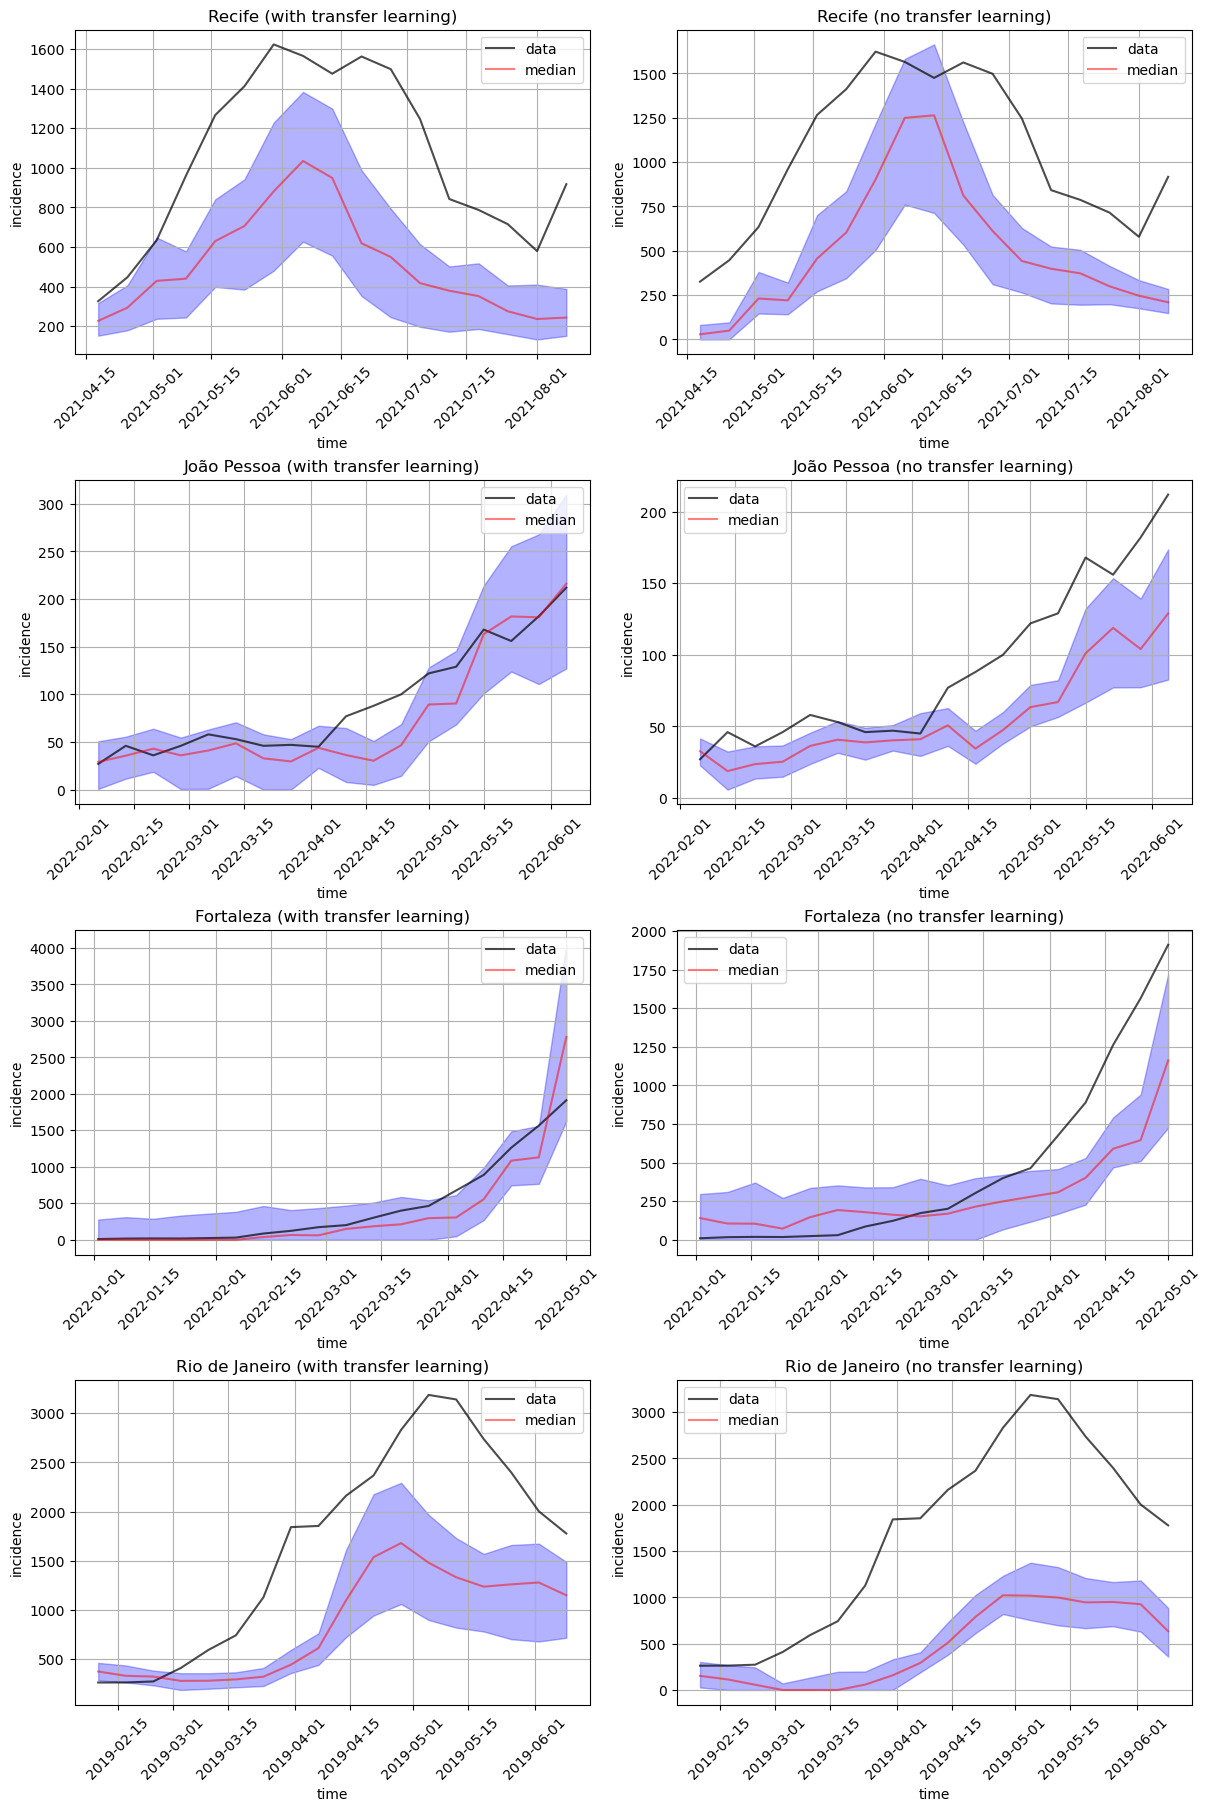

In [18]:
plot_chik_bi_lstm()

In [19]:

def plot_cross_qq(ax, q_o, q_p):
    sns.kdeplot(q_o[len(q_p) - len(q_o):], q_p, ax =ax, shade=True)
    ax.set_xlabel('observed')
    ax.set_ylabel('predicted')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.plot([0, 100], [0, 100], 'k')
    #P.title(f'Transfer prediction percentiles with {model_name.lower()} for {doenca} at {city_name}')
    
def predicted_vs_observed(ax, predicted, real, plot=True):
    """
    Plot QQPlot for prediction values
    :param plot: generates an saves the qqplot when True (default)
    :param predicted: Predicted matrix
    :param real: Array of target_col values used in the prediction
    :param city: Geocode of the target city predicted
    :param state: State containing the city
    :param look_back: Look-back time window length used by the model
    :param all_predict_n: If True, plot the qqplot for every week predicted
    :return:
    """
    # Name = get_city_names([city])
    # data = get_alerta_table(city, state, doenca=doenca)

    obs_preds = np.hstack((predicted, real))
    q_p = [ss.percentileofscore(obs_preds, x) for x in predicted]
    q_o = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(ax, q_o, q_p)
    return np.array(q_o), np.array(q_p)

In [20]:
def plot_qqplot_pgbm():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    CITY = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index_ml = data['dates'].index(datetime.strptime(ini_evaluate_re, '%Y-%m-%d'))
    end_index_ml = data['dates'].index(datetime.strptime(end_evaluate_re, '%Y-%m-%d'))
    
    predicted = data['preds'][ini_index_ml:end_index_ml]
    real = data['target'].values[ini_index_ml + 4: end_index_ml + 4]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
            
    ini_index_ml = data['dates'].index(datetime.strptime(ini_evaluate_jp, '%Y-%m-%d'))
    end_index_ml = data['dates'].index(datetime.strptime(end_evaluate_jp, '%Y-%m-%d'))
    
    predicted = data['preds'][ini_index_ml:end_index_ml]
    real = data['target'].values[ini_index_ml + 4: end_index_ml + 4]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index_ml = data['dates'].index(datetime.strptime(ini_evaluate_fo, '%Y-%m-%d'))
    end_index_ml = data['dates'].index(datetime.strptime(end_evaluate_fo, '%Y-%m-%d'))
    
    predicted = data['preds'][ini_index_ml:end_index_ml]
    real = data['target'].values[ini_index_ml + 4: end_index_ml + 4]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    CITY = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/pgbm/pgbm_{CITY}_{doenca}_cross_predictions.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index_ml = data['dates'].index(datetime.strptime(ini_evaluate_rj, '%Y-%m-%d'))
    end_index_ml = data['dates'].index(datetime.strptime(end_evaluate_rj, '%Y-%m-%d'))
    
    predicted = data['preds'][ini_index_ml:end_index_ml]
    real = data['target'].values[ini_index_ml + 4: end_index_ml + 4]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))
    
    fig.savefig(f'../figures/qqplot_pgbm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  -20.58823529411765 -32.35294117647059 -8.823529411764707
Predicted for João Pessoa :  -15.277777777777777 -22.222222222222214 -3.472222222222222
Predicted for Fortaleza :  -8.333333333333336 -16.66666666666667 13.194444444444445
Predicted for Rio de Janeiro :  2.7777777777777786 -20.83333333333333 24.305555555555557


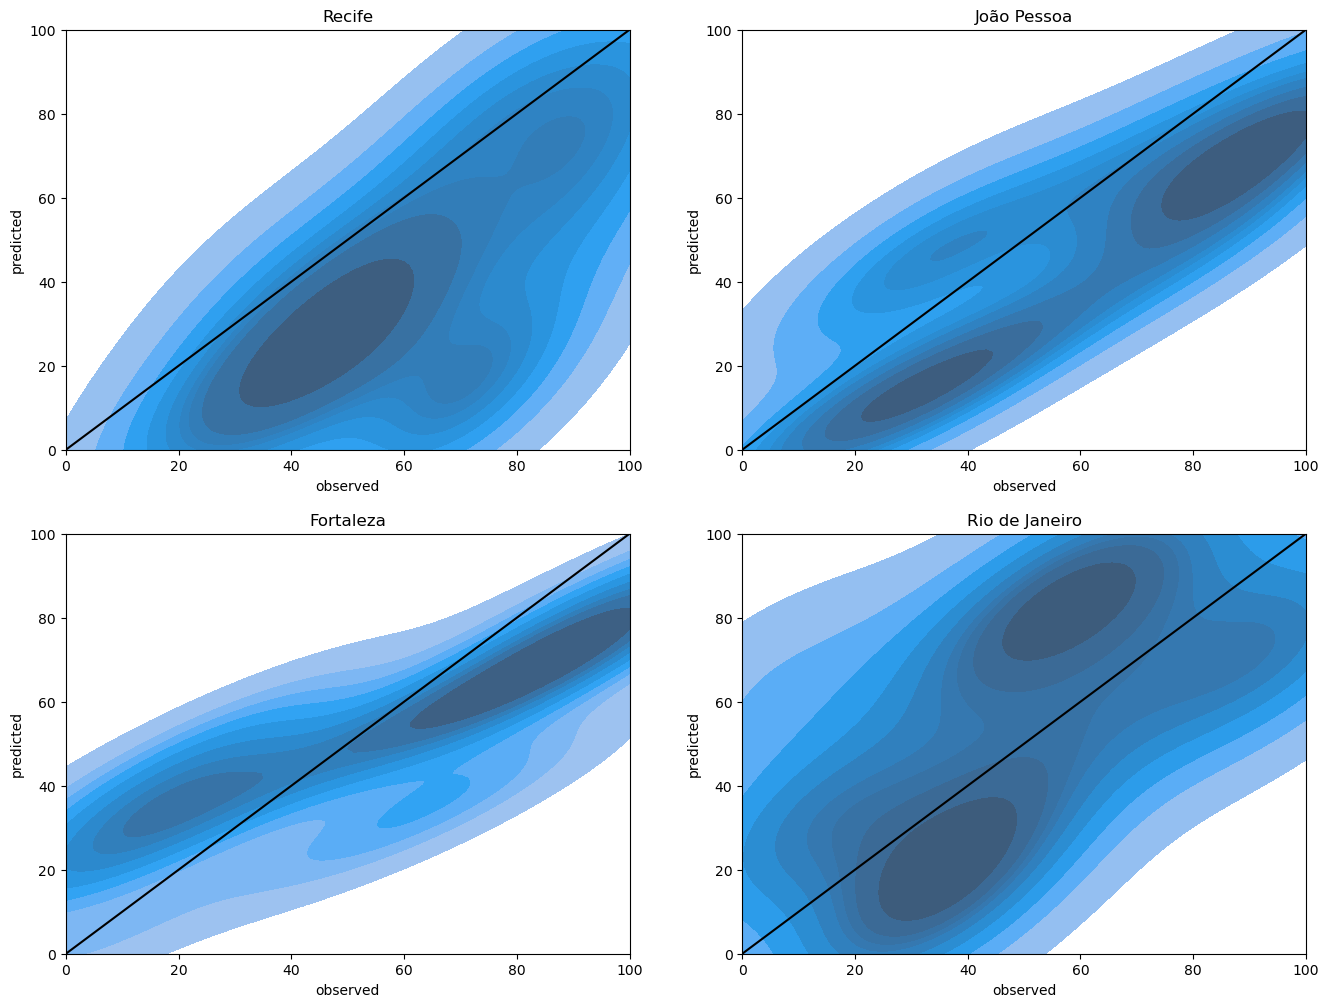

In [21]:
plot_qqplot_pgbm()

In [24]:
def plot_qqplot_bi_lstm():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_re, '%Y-%m-%d'))
    end_index = data['indice'].index(datetime.strptime(end_evaluate_re, '%Y-%m-%d'))
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_jp, '%Y-%m-%d'))
    end_index = data['indice'].index(datetime.strptime(end_evaluate_jp, '%Y-%m-%d'))
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_fo, '%Y-%m-%d'))
    end_index = data['indice'].index(datetime.strptime(end_evaluate_fo, '%Y-%m-%d'))
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]
    
    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    with open(f'../predictions/lstm/lstm_{city}_chik_predictions_msle_all.pkl', 'rb') as f:
            data = pickle.load(f)
            
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_rj, '%Y-%m-%d'))
    end_index = data['indice'].index(datetime.strptime(end_evaluate_rj, '%Y-%m-%d'))
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    fig.savefig(f'../figures/qqplot_bi_lstm.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  -26.470588235294116 -32.352941176470594 -14.705882352941174
Predicted for João Pessoa :  -11.111111111111114 -16.666666666666668 -8.333333333333329
Predicted for Fortaleza :  8.333333333333334 -4.861111111111104 25.694444444444443
Predicted for Rio de Janeiro :  -27.08333333333333 -30.208333333333336 -20.1388888888889


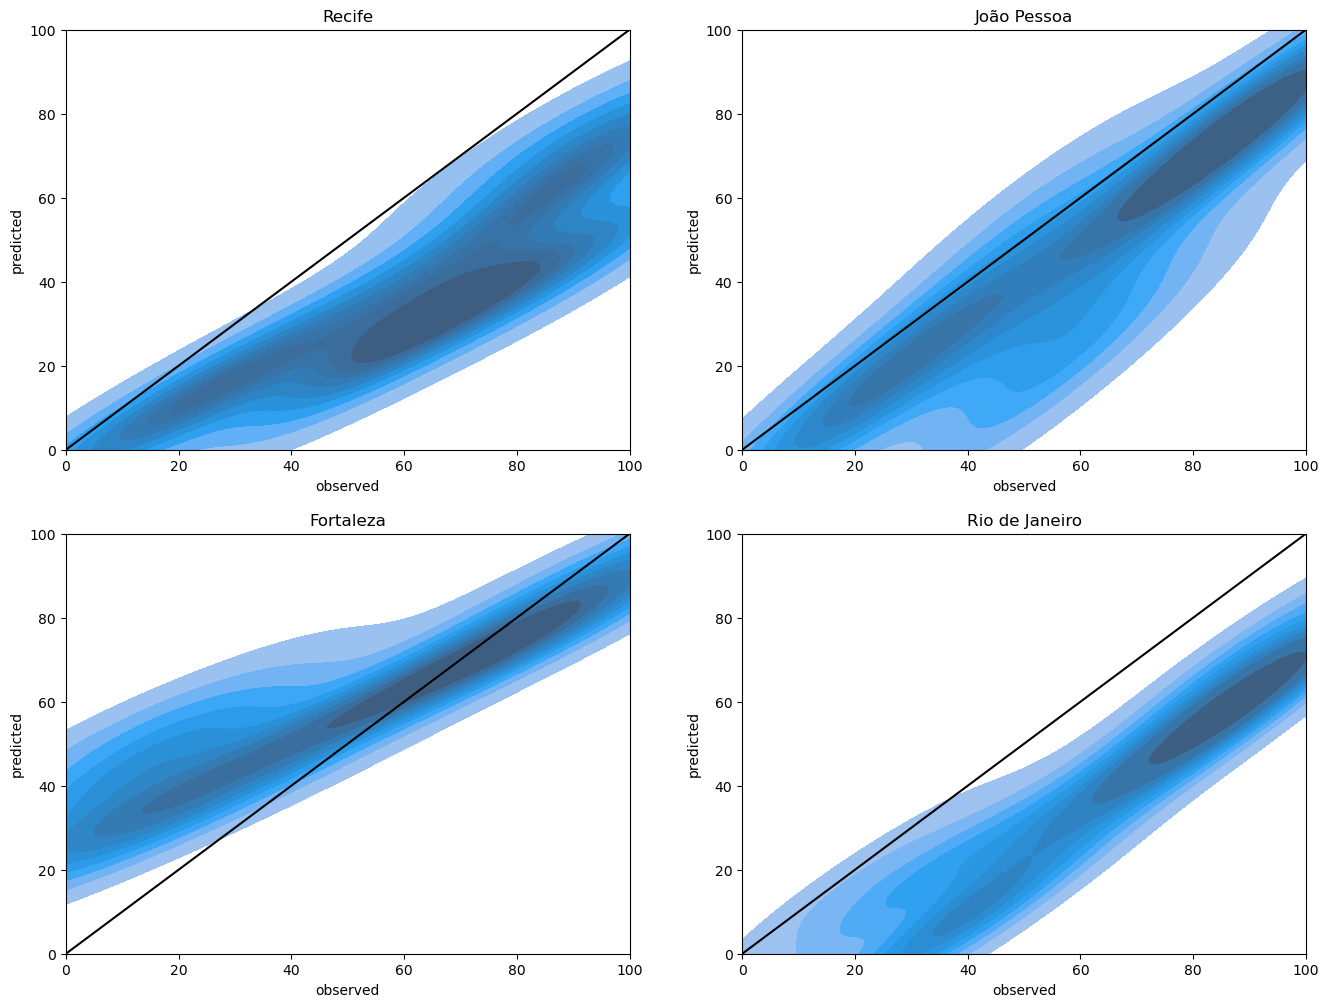

In [25]:
plot_qqplot_bi_lstm()

In [26]:
def plot_qqplot_bi_lstm_transfer():
    
    fig, axs = plt.subplots(2, 2, figsize=(16,12))
    
    city = 2611606
    city_name = 'Recife'
    doenca = 'chik'
    pw = 1
    label = 'transf_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
            
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_re, '%Y-%m-%d').date())
    end_index = data['indice'].index(datetime.strptime(end_evaluate_re, '%Y-%m-%d').date())
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,0], qo, qp)
    
    axs[0, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2507507
    city_name = 'João Pessoa'
    doenca = 'chik'
    pw = 1
    label = 'transf_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_jp, '%Y-%m-%d').date())
    end_index = data['indice'].index(datetime.strptime(end_evaluate_jp, '%Y-%m-%d').date())
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    
    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[0,1], qo, qp)
    
    axs[0, 1].set_title(city_name)
    
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 2304400
    city_name = 'Fortaleza'
    doenca = 'chik'
    pw = 1
    label = 'transf_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_fo, '%Y-%m-%d').date())
    end_index = data['indice'].index(datetime.strptime(end_evaluate_fo, '%Y-%m-%d').date())
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]

    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,0], qo, qp)
    
    axs[1, 0].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    city = 3304557
    city_name = 'Rio de Janeiro'
    doenca = 'chik'
    pw = 1
    label = 'transf_msle'
    with open(f'../predictions/lstm/tl_{city}_{label}.pkl', 'rb') as f:
            data = pickle.load(f)
    
    ini_index = data['indice'].index(datetime.strptime(ini_evaluate_rj, '%Y-%m-%d').date())
    end_index = data['indice'].index(datetime.strptime(end_evaluate_rj, '%Y-%m-%d').date())
            
    predicted = data['pred'][ini_index -7: end_index -7][pw].values
    real = data['target'][ini_index -7: end_index -7, pw]
    
    obs_preds = np.hstack((predicted, real))
    qp = [ss.percentileofscore(obs_preds, x) for x in predicted]
    qo = [ss.percentileofscore(obs_preds, x) for x in real]
    plot_cross_qq(axs[1,1], qo, qp)

    axs[1, 1].set_title(city_name)
    qp = np.array(qp)
    qo = np.array(qo)
    print(f"Predicted for {city_name} : ", np.median(qp - qo), np.percentile(qp - qo, 25), np.percentile(qp - qo, 75))

    fig.savefig(f'../figures/qqplot_bi_lstm_transfer.png',bbox_inches='tight', format = 'png', dpi = 300)
    
    return 

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

Predicted for Recife :  -35.294117647058826 -50.00000000000001 -26.470588235294116
Predicted for João Pessoa :  -9.722222222222225 -25.69444444444444 -3.552713678800501e-15
Predicted for Fortaleza :  -18.05555555555555 -27.083333333333336 -6.944444444444446
Predicted for Rio de Janeiro :  -18.055555555555554 -24.305555555555557 2.0833333333333313


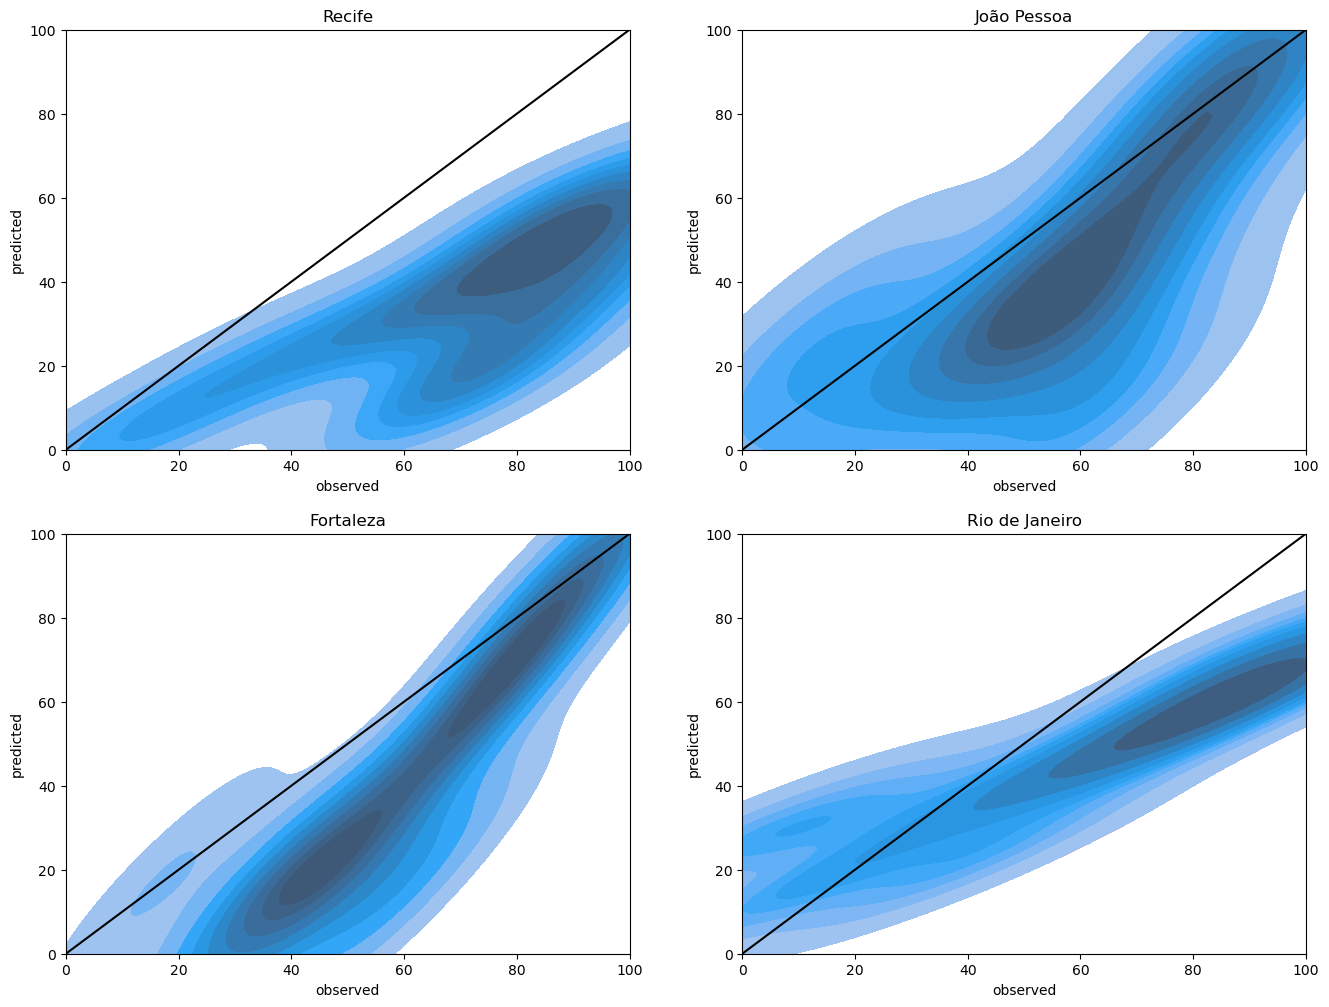

In [27]:
plot_qqplot_bi_lstm_transfer()

In [28]:
def get_preds(CITY):
    with open(f'../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
        data_nn = pickle.load(f)
    
    doenca = 'dengue'
    with open(f'../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
            data_ml = pickle.load(f)

    with open(f'../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
            data_tl = pickle.load(f)
            
    return data_nn, data_ml, data_tl 

def plot_comp(ax, city, ini_evaluate, end_evaluate, title): 
    
    data_nn, data_ml, data_tl = get_preds(city)

    ini_index = data_nn['indice'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index = data_nn['indice'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_nn['indice'][ini_index:end_index], data_nn['target'][ini_index - 7: end_index - 7, -1] * data_nn['factor'] , color = 'black', label = 'data', linewidth=2)

    ax.plot(data_nn['indice'][ini_index:end_index],data_nn['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], label = 'NN', ls = 'dashed', linewidth=2)
    
    ax.fill_between(data_nn['indice'][ini_index:end_index],data_nn['lb'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'],
                    data_nn['ub'].iloc[ini_index - 7: end_index - 7,-1] * data_nn['factor'], 
                    alpha = 0.2)
    
    
    ax.plot(data_tl['indice'][ini_index:end_index], data_tl['pred'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'], label = f'TL', linewidth=2,
                        color = 'tab:red', ls = 'dashdot')
    
    ax.fill_between(data_tl['indice'][ini_index:end_index], data_tl['pred25'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'], 
                    data_tl['pred975'].iloc[ini_index - 7: end_index - 7,-1] * data_tl['factor'],
                        color = 'tab:red', alpha = 0.2)

    ini_index_ml = data_ml['dates'].index(datetime.strptime(ini_evaluate, '%Y-%m-%d'))
    end_index_ml = data_ml['dates'].index(datetime.strptime(end_evaluate, '%Y-%m-%d'))

    ax.plot(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds'][ini_index_ml: end_index_ml], label = 'ML', ls = 'dotted', linewidth=2)
    
    ax.fill_between(data_ml['dates'][ini_index_ml:end_index_ml],data_ml['preds25'][ini_index_ml: end_index_ml],
                   data_ml['preds975'][ini_index_ml: end_index_ml], alpha = 0.2, color = 'tab:orange')

    ax.grid()
    
    ax.legend()
    
    ax.set_title(f'Chik predictions at {title}')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

def plot_comp_all():
    fig, axd = plt.subplot_mosaic([['a', 'b'],
                                  ['c', 'd']],
                              figsize=(12, 9), layout="constrained")

    plot_comp(axd['a'], 2611606, ini_evaluate = ini_evaluate_re, 
            end_evaluate = end_evaluate_re, title = 'Recife')
    
    plot_comp(axd['b'], 2507507, ini_evaluate = ini_evaluate_jp, 
            end_evaluate = end_evaluate_jp, title = 'João Pessoa')
    
    plot_comp(axd['c'], 2304400, ini_evaluate = ini_evaluate_fo, 
            end_evaluate = end_evaluate_fo, title = 'Fortaleza')

    plot_comp(axd['d'], 3304557, ini_evaluate = ini_evaluate_rj, 
            end_evaluate = end_evaluate_rj, title = 'Rio de Janeiro')

    plt.savefig('../figures/comp_all_chik.png', dpi = 300)


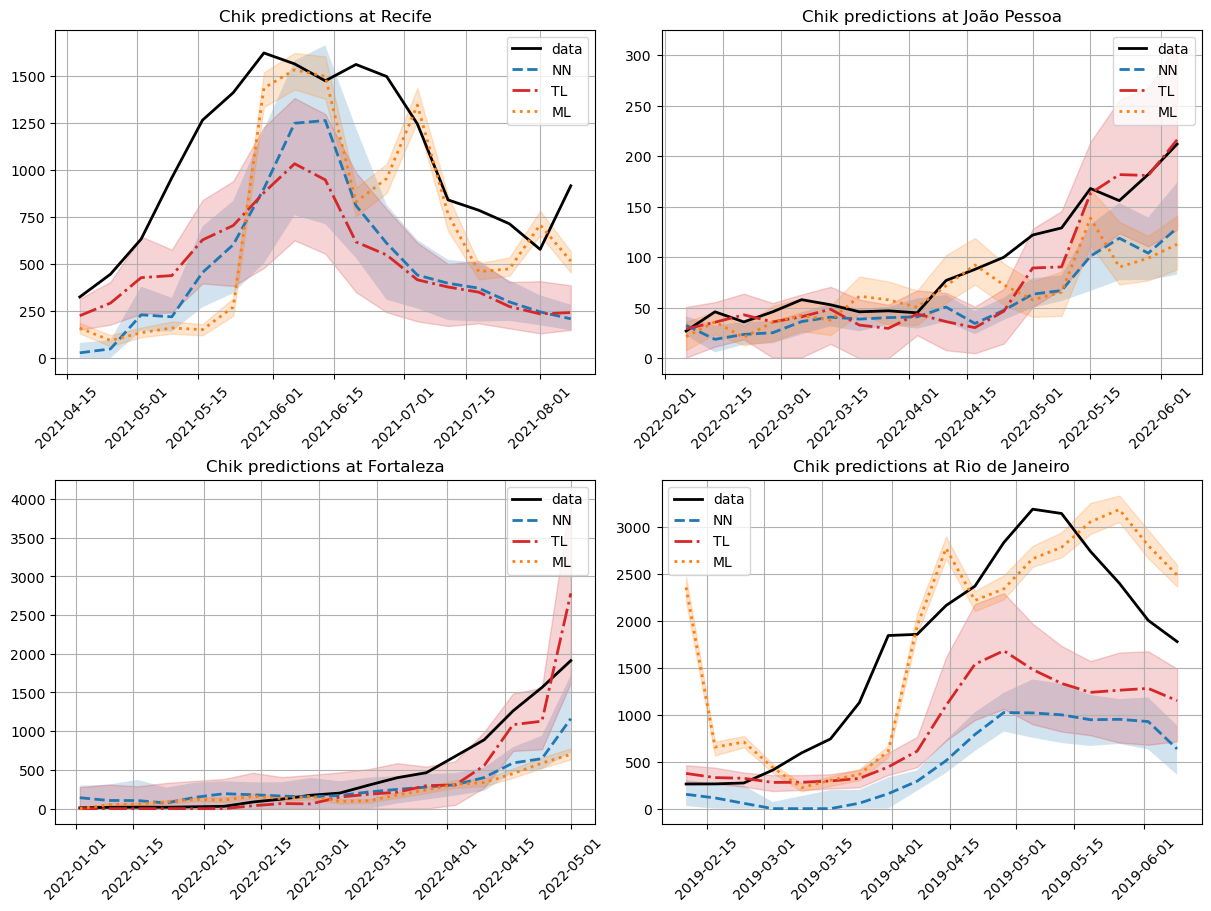

In [29]:
plot_comp_all()